# Question 1. Climate change stands as one of the most urgent challenges confronting our planet today. To effectively comprehend and address this critical issue, access to precise and comprehensive data regarding global temperatures and other climate-related factors is indispensable.

## _**Goal**:  To conduct an in-depth Exploratory Data Analysis (EDA) on this dataset. This analysis aims to extract insights and answer crucial questions about the data by delving into trends and patterns._

In [184]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import simple_colors

from sklearn.linear_model import LinearRegression

In [185]:
df = pd.read_csv("E:\WPI\Fall_2024\CS539_MachineLearning\earth_surface_temperatures.csv")


## 0. Understanding the data

In [186]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534571 entries, 0 to 534570
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Years              534571 non-null  int64  
 1   Month              534571 non-null  int64  
 2   Country            534571 non-null  object 
 3   Temperature        508818 non-null  float64
 4   Monthly_variation  508818 non-null  float64
 5   Anomaly            508818 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 24.5+ MB
None


In [187]:
print(df.describe())

               Years          Month    Temperature  Monthly_variation  \
count  534571.000000  534571.000000  508818.000000      508818.000000   
mean     1917.483008       6.500676      17.059014          -0.075495   
std        65.628555       3.452036      11.201763           1.231296   
min      1743.000000       1.000000     -40.349000         -10.566000   
25%      1873.000000       4.000000       9.776250          -0.663000   
50%      1924.000000       7.000000      20.705000          -0.076000   
75%      1972.000000      10.000000      25.911000           0.552000   
max      2020.000000      12.000000      39.384000          11.817000   

             Anomaly  
count  508818.000000  
mean        0.888305  
std         1.069699  
min         0.037000  
25%         0.293000  
50%         0.494000  
75%         1.004000  
max        12.203000  


In [188]:
print(df.duplicated().sum())

0


### a. Identify and rectify any missing values in the data using appropriate techniques.

Years                    0
Month                    0
Country                  0
Temperature          25753
Monthly_variation    25753
Anomaly              25753
dtype: int64


<Axes: >

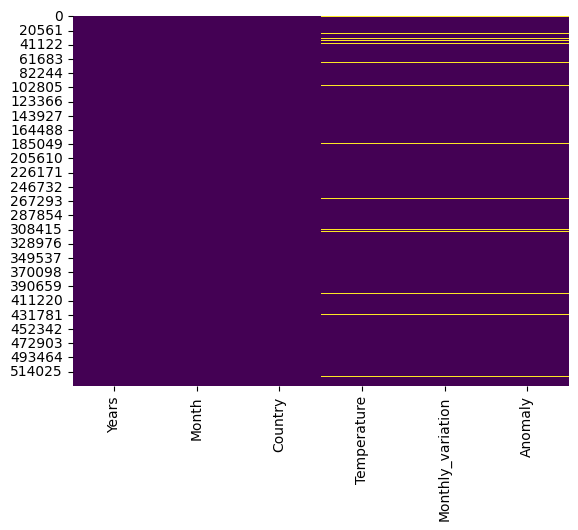

In [189]:
print(df.isnull().sum())

# Plot a heatmap of missing values. A heatmap can help us understand where the data is missing which can make it easier to choose a rectifying technique. 
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')

In [190]:
#RECTIFYING: Since the missing data is about 4.9% of the total data, and is missing at different points of times, we choose to delete the specific rows/records.
df_cleaned = df.dropna()
print(df_cleaned)

        Years  Month      Country  Temperature  Monthly_variation  Anomaly
0        1848      5  Afghanistan       19.573             -0.297    2.037
1        1848      6  Afghanistan       23.894             -0.796    2.136
2        1848      7  Afghanistan       26.507             -0.113    1.937
3        1848      8  Afghanistan       24.498             -0.462    1.937
4        1848      9  Afghanistan       19.068             -1.272    1.865
...       ...    ...          ...          ...                ...      ...
534566   2020      8     Zimbabwe       19.621              1.401    0.466
534567   2020      9     Zimbabwe       22.638              1.008    0.246
534568   2020     10     Zimbabwe       24.588              0.458    0.294
534569   2020     11     Zimbabwe       25.934              1.724    1.035
534570   2020     12     Zimbabwe       23.595             -0.025    0.574

[508818 rows x 6 columns]


### b. Transform the Years and Month columns into a single column labeled "Date" in the MM-YYYY format, with a datetime64[ns] data type. For example, the year 1848 and month 5 should be unified as a single value, such as 5-1848.

In [191]:
#Combining Month and Year into Date format
df_cleaned['Date'] = df_cleaned['Month'].astype(str).str.zfill(2) + '-' + df_cleaned['Years'].astype(str)

#Adding the dates
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%m-%Y')

#Droping Year and Month columns 
df_cleaned = df_cleaned.drop(columns=['Years', 'Month'])

print(df_cleaned)

            Country  Temperature  Monthly_variation  Anomaly       Date
0       Afghanistan       19.573             -0.297    2.037 1848-05-01
1       Afghanistan       23.894             -0.796    2.136 1848-06-01
2       Afghanistan       26.507             -0.113    1.937 1848-07-01
3       Afghanistan       24.498             -0.462    1.937 1848-08-01
4       Afghanistan       19.068             -1.272    1.865 1848-09-01
...             ...          ...                ...      ...        ...
534566     Zimbabwe       19.621              1.401    0.466 2020-08-01
534567     Zimbabwe       22.638              1.008    0.246 2020-09-01
534568     Zimbabwe       24.588              0.458    0.294 2020-10-01
534569     Zimbabwe       25.934              1.724    1.035 2020-11-01
534570     Zimbabwe       23.595             -0.025    0.574 2020-12-01

[508818 rows x 5 columns]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_19196\1102377934.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = df_cleaned['Month'].astype(str).str.zfill(2) + '-' + df_cleaned['Years'].astype(str)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19196\1102377934.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'], format='%m-%Y')


In [192]:
#Bringing the Date Column to the left
cols = ['Date'] + [col for col in df_cleaned.columns if col != 'Date']
df_cleaned = df_cleaned[cols]
print(df_cleaned)

             Date      Country  Temperature  Monthly_variation  Anomaly
0      1848-05-01  Afghanistan       19.573             -0.297    2.037
1      1848-06-01  Afghanistan       23.894             -0.796    2.136
2      1848-07-01  Afghanistan       26.507             -0.113    1.937
3      1848-08-01  Afghanistan       24.498             -0.462    1.937
4      1848-09-01  Afghanistan       19.068             -1.272    1.865
...           ...          ...          ...                ...      ...
534566 2020-08-01     Zimbabwe       19.621              1.401    0.466
534567 2020-09-01     Zimbabwe       22.638              1.008    0.246
534568 2020-10-01     Zimbabwe       24.588              0.458    0.294
534569 2020-11-01     Zimbabwe       25.934              1.724    1.035
534570 2020-12-01     Zimbabwe       23.595             -0.025    0.574

[508818 rows x 5 columns]


### c. Detect and investigate extreme temperature values that might be regarded as outliers

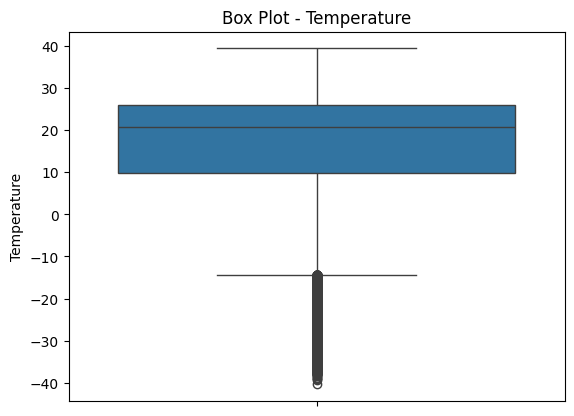

In [193]:
sns.boxplot(df["Temperature"])
plt.title("Box Plot - Temperature")
plt.show()

In [194]:
#Using Interquartile Range Method

Q1 = df_cleaned['Temperature'].quantile(0.25)
Q3 = df_cleaned['Temperature'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")
outliers = df_cleaned[(df_cleaned['Temperature'] < lower_bound) | (df_cleaned['Temperature'] > upper_bound)]

print("Outliers:")
print(outliers)

Lower bound: -14.425875000000001
Upper bound: 50.113125000000004
Outliers:
             Date     Country  Temperature  Monthly_variation  Anomaly
17077  1956-02-01  Antarctica      -16.628              0.712    1.165
17078  1956-03-01  Antarctica      -24.355             -0.025    1.423
17079  1956-04-01  Antarctica      -28.810             -0.010    1.667
17080  1956-05-01  Antarctica      -31.041             -0.351    1.056
17081  1956-06-01  Antarctica      -31.425              0.335    1.000
...           ...         ...          ...                ...      ...
477992 1930-01-01  Tajikistan      -15.704             -5.914    0.826
478028 1933-01-01  Tajikistan      -14.879             -5.089    1.373
478040 1934-01-01  Tajikistan      -15.785             -5.995    0.707
478928 2008-01-01  Tajikistan      -15.220             -5.430    0.998
504339 1929-02-01     Ukraine      -14.966            -10.566    0.380

[6895 rows x 5 columns]


### d. Compute summary statistics for temperature, monthly variation, and anomaly values, including mean, median, standard deviation and range.

In [195]:
print(df.describe())

               Years          Month    Temperature  Monthly_variation  \
count  534571.000000  534571.000000  508818.000000      508818.000000   
mean     1917.483008       6.500676      17.059014          -0.075495   
std        65.628555       3.452036      11.201763           1.231296   
min      1743.000000       1.000000     -40.349000         -10.566000   
25%      1873.000000       4.000000       9.776250          -0.663000   
50%      1924.000000       7.000000      20.705000          -0.076000   
75%      1972.000000      10.000000      25.911000           0.552000   
max      2020.000000      12.000000      39.384000          11.817000   

             Anomaly  
count  508818.000000  
mean        0.888305  
std         1.069699  
min         0.037000  
25%         0.293000  
50%         0.494000  
75%         1.004000  
max        12.203000  


### e. Identify the countries included in the dataset and calculate their average temperature values

In [196]:
#Identifying countries
countries = df_cleaned['Country'].unique()
print(countries)

#Calculating average temperatures
avg_temperature = df_cleaned.groupby('Country')['Temperature'].mean()
for country, temp in avg_temperature.items():
    print(f"{country}: {temp}")

['Afghanistan' 'Albania' 'Algeria' 'American Samoa' 'Andorra' 'Angola'
 'Anguilla' 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Aruba' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain'
 'Baker Island' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize'
 'Benin' 'Bhutan' 'Bolivia' 'Bonaire, Saint Eustatius and Saba'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'British Virgin Islands'
 'Bulgaria' 'Burkina Faso' 'Burma' 'Burundi' 'Cambodia' 'Cameroon'
 'Canada' 'Cape Verde' 'Cayman Islands' 'Central African Republic' 'Chad'
 'Chile' 'China' 'Christmas Island' 'Colombia' 'Comoros' 'Congo'
 'Congo (Democratic Republic of the)' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czech Republic' 'Denmark' 'Denmark (Europe)' 'Djibouti'
 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Falkland Islands (Islas Malvinas)' 'Faroe Islands'
 'Federated States of Micronesia' 'Fiji' 'Finland' 'France'
 'France (Europe)' 'F

### f. Determine the overall trend in global temperatures over the years and visualize this trend using a suitable chart.

In [197]:
#Date-wise stats
date_trend_stats = df_cleaned.groupby('Date')['Temperature'].agg(['mean'])
print(date_trend_stats)

#Since Climate change is epxerienced throught the years we can also calculate year wise stats
df_cleaned['Year'] = df_cleaned['Date'].dt.year
year_trend_stats = df_cleaned.groupby('Year')['Temperature'].agg(['mean'])
print("Trend through the years:")
print(year_trend_stats)

                 mean
Date                 
1744-04-01   8.111000
1744-05-01   9.563000
1744-06-01  12.868286
1744-07-01  14.750429
1744-09-01  12.509000
...               ...
2020-08-01  23.918777
2020-09-01  22.656571
2020-10-01  20.139245
2020-11-01  17.626361
2020-12-01  15.251339

[3263 rows x 1 columns]
Trend through the years:
           mean
Year           
1744   9.490500
1745   2.704857
1750   7.949645
1751   7.508574
1752   7.589140
...         ...
2016  19.645449
2017  19.528764
2018  19.599354
2019  19.756866
2020  19.771143

[273 rows x 1 columns]


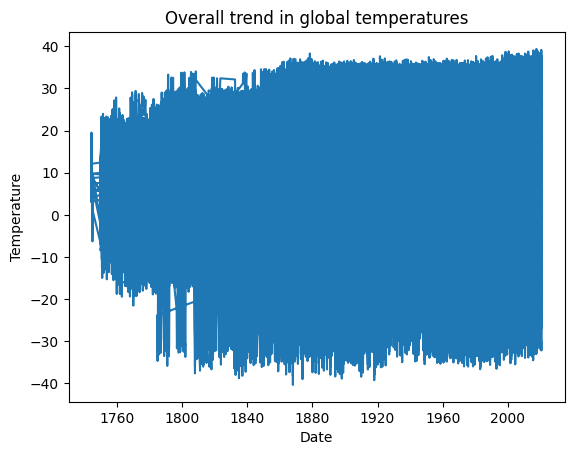

In [198]:
#Visualising using a line chart

plt.plot(df_cleaned['Date'], df_cleaned['Temperature'])
plt.title("Overall trend in global temperatures")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19196\2867480978.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_positive = df_cleaned[df['Temperature'] >= 0]
C:\Users\ASUS\AppData\Local\Temp\ipykernel_19196\2867480978.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_negative = df_cleaned[df['Temperature'] < 0]


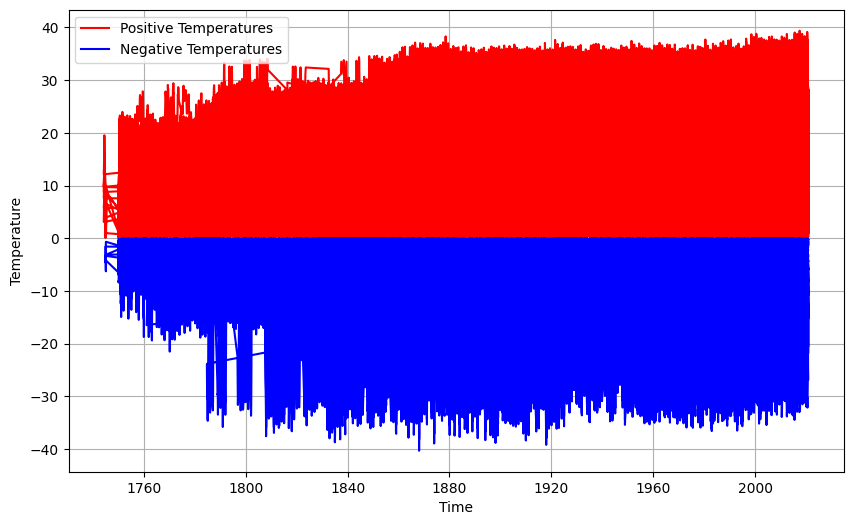

In [199]:
df_positive = df_cleaned[df['Temperature'] >= 0]
df_negative = df_cleaned[df['Temperature'] < 0]

plt.figure(figsize=(10,6))
plt.plot(df_positive['Date'], df_positive['Temperature'], label='Positive Temperatures', color='red')
plt.plot(df_negative['Date'], df_negative['Temperature'], label='Negative Temperatures', color='blue')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

### f. Identify the months with the highest and lowest temperatures for each country and find out whether there are noticeable seasonal patterns in the temperature data. 

In [200]:
df_cleaned['Date'] = pd.to_datetime(df_cleaned['Date'])
df_cleaned['Month'] = df_cleaned['Date'].dt.month
df_cleaned['Year'] = df_cleaned['Date'].dt.year

monthly_average = df_cleaned.groupby(['Country', 'Month']).agg({'Temperature':'mean'}).reset_index()

max_temps_each_country = monthly_average.loc[monthly_average.groupby('Country')['Temperature'].idxmax()]
min_temps_each_country = monthly_average.loc[monthly_average.groupby('Country')['Temperature'].idxmin()]
print(simple_colors.red("Maximum temperatures by country:"))
print(max_temps_each_country)
print(simple_colors.blue("Minimum temperatures by country:"))
print(min_temps_each_country)


Maximum temperatures by country:
             Country  Month  Temperature
6        Afghanistan      7    26.778933
18           Albania      7    22.441052
30           Algeria      7    33.654522
38    American Samoa      3    27.225573
54           Andorra      7    19.393498
...              ...    ...          ...
2743  Virgin Islands      8    28.024320
2755  Western Sahara      8    30.697791
2766           Yemen      7    31.149187
2781          Zambia     10    24.659558
2794        Zimbabwe     11    24.500000

[233 rows x 3 columns]
Minimum temperatures by country:
             Country  Month  Temperature
0        Afghanistan      1     0.616685
12           Albania      1     3.083399
24           Algeria      1    12.105382
43    American Samoa      8    26.297168
48           Andorra      1     3.809317
...              ...    ...          ...
2737  Virgin Islands      2    24.664339
2748  Western Sahara      1    16.552369
2760           Yemen      1    20.036350
2778    

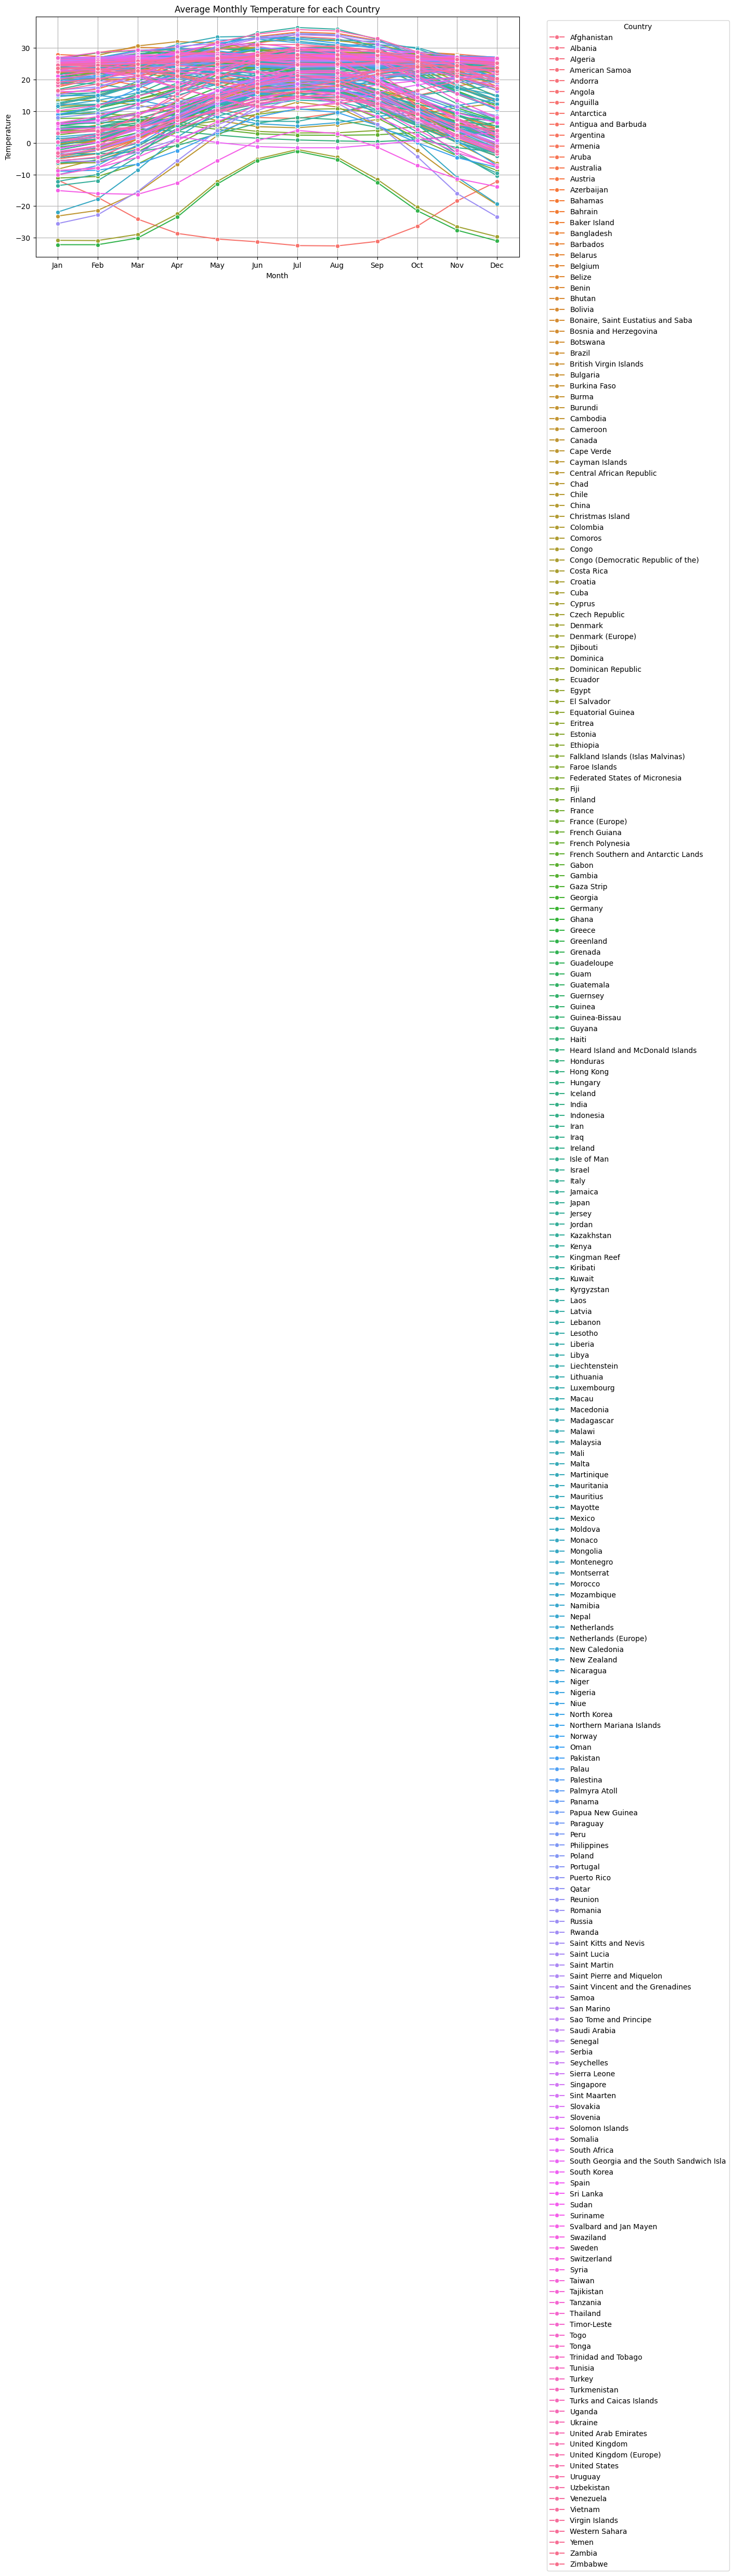

In [201]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_average, x='Month', y='Temperature', hue='Country', marker='o')

plt.title('Average Monthly Temperature for each Country')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [202]:
for index, row in df_cleaned.iterrows():
    temps = row['Temperature']
    month = row['Month']
    coldest_country_in_july = row['Country']
    if month == 7 and temps<-30:
        a = coldest_country_in_july
print(a)

Antarctica


### _We can see that on an average most of the countries had temperatures ranging from -15 to 35 throughout the years, except for a few countries._ 
### _Most countries had their peak temperature months in july, following a seasonal pattern of having summer in the months from March to July, before temperature starts falling. Similarly, for most countries the coldest months can be said to be December and January._ 

### h. Explore the variation in temperature anomalies on a monthly basis and identify any months with consistently high or low anomalies across the years.

In [203]:
monthly_anomaly = df_cleaned.groupby(['Year', 'Month'])['Anomaly'].mean().reset_index()
print(monthly_anomaly)
monthly_anomaly_pivot = monthly_anomaly.pivot(index='Year', columns='Month', values='Anomaly')
print(monthly_anomaly_pivot)

      Year  Month   Anomaly
0     1744      4  2.237286
1     1744      5  1.941714
2     1744      6  1.880714
3     1744      7  1.820571
4     1744      9  1.987429
...    ...    ...       ...
3258  2020      8  0.334484
3259  2020      9  0.354658
3260  2020     10  0.341386
3261  2020     11  0.461459
3262  2020     12  0.545230

[3263 rows x 3 columns]
Month        1         2         3         4         5         6         7   \
Year                                                                          
1744        NaN       NaN       NaN  2.237286  1.941714  1.880714  1.820571   
1745   2.026429  2.010857  2.004286  2.020714       NaN       NaN       NaN   
1750   2.031200  2.598022  2.770139  1.832600  1.802156  1.908867  2.075067   
1751   2.049556  2.176511  1.989311  1.775044  1.713158  1.936222  1.837553   
1752   2.007659  1.867865  1.770750  1.819864  1.613541  1.487973  1.642973   
...         ...       ...       ...       ...       ...       ...       ...   
2016   

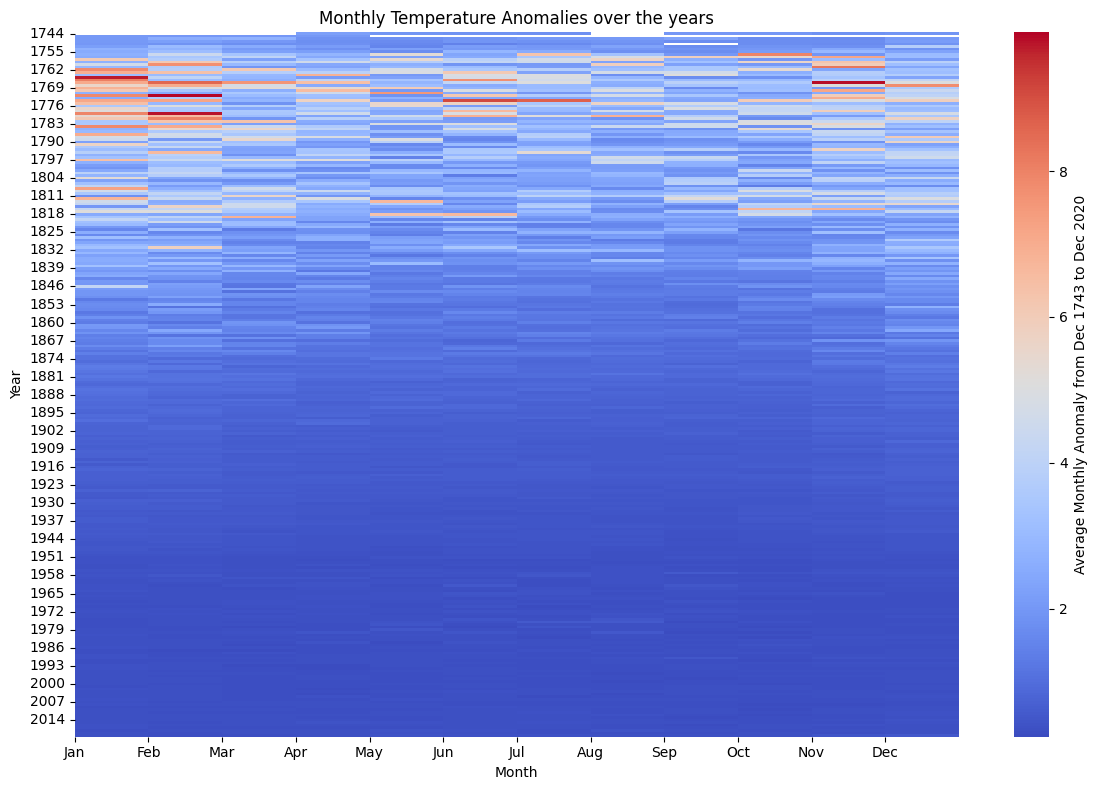

In [204]:
plt.figure(figsize=(12,8))
plt.title('Monthly Temperature Anomalies over the years')
sns.heatmap(monthly_anomaly_pivot, cmap='coolwarm', annot=False, cbar_kws={'label': 'Average Monthly Anomaly from Dec 1743 to Dec 2020'})
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(range(12), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.tight_layout()
plt.show()

### _A consistent negative anomalies can be seen after around 1870s until 2020. On the other hand, all the highest anomalies can be seen in the years 1760s to 1780s in the months of January, Februray, March, June and November._

### i. Choose five countries and compare the trends in their temperatures over the years, seeking any similar temperature patterns.

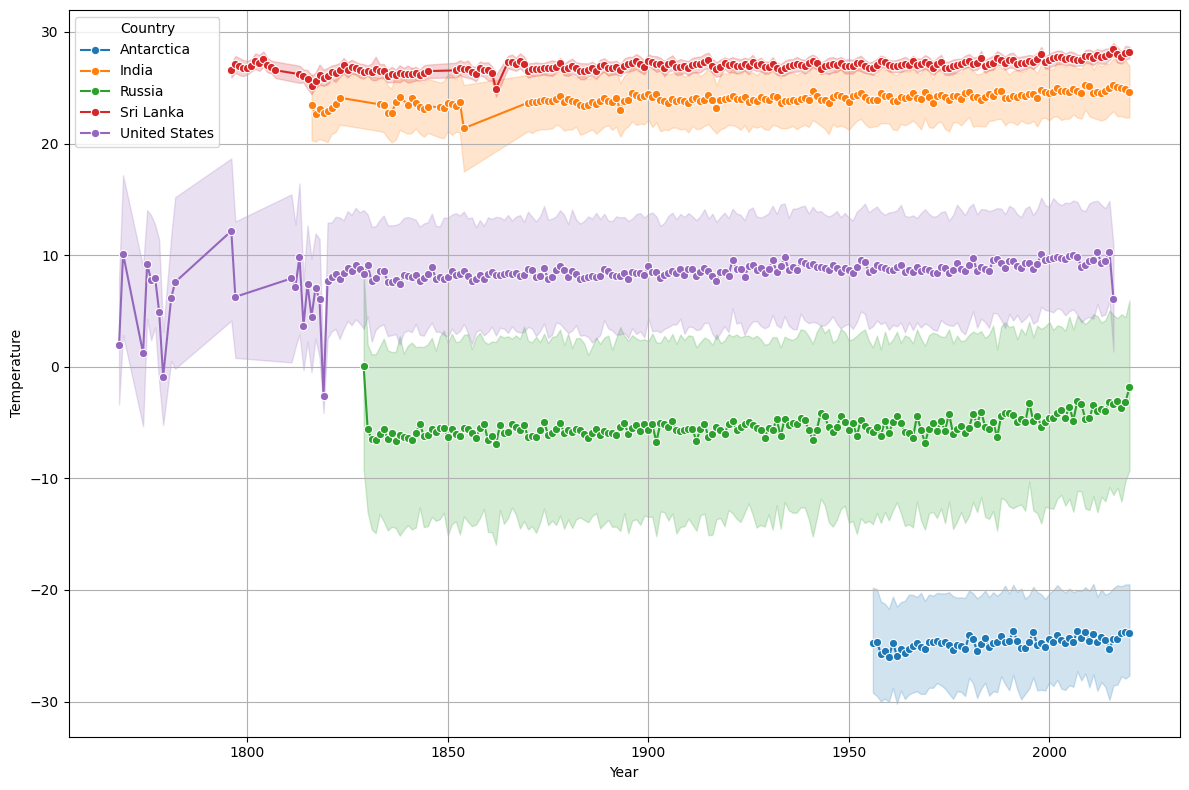

In [205]:
chosen_countries = ['India', 'United States', 'Russia', 'Sri Lanka', 'Antarctica']
df_5countries = df_cleaned[df_cleaned['Country'].isin(chosen_countries)]

plt.figure(figsize=(12, 8))

sns.lineplot(x='Year', y='Temperature', hue='Country', data=df_5countries, marker='o')
plt.grid(True)
plt.tight_layout()
plt.show()

### Two of our chosen countries lie in the region of Temperature 20-30, other two lie in -15 to 15 and Antarctica lies in -30 to -20. The figure shows us the amount of data missing: Antarctica is missing almost three fourths of data, while India, Sri Lanka and Russia are missing data of about 50 years. From the semi-transparent region around the lines, the confidence intervals, data tells us that 4 countries exculding India had variations of temperatures throughout the years. Further, United States had the most major temperatures changes in the years from 1760s to 1820s.

### k. Provide an intriguing insight from the dataset by utilizing data visualization techniques such as histograms, box plots, or heatmaps to represent the data's distribution, trends, and relationships. 

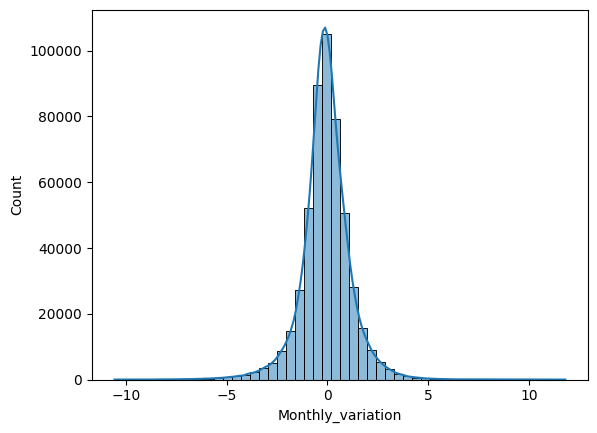

In [206]:
#histogram_temperature
sns.histplot(df_cleaned['Monthly_variation'], bins=50,kde='True')
plt.show()

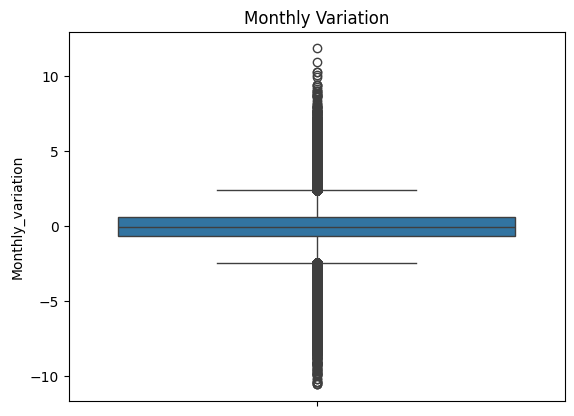

In [207]:
#boxplot_monthly_variation
sns.boxplot(df_cleaned['Monthly_variation'])
plt.title('Monthly Variation')
plt.show()

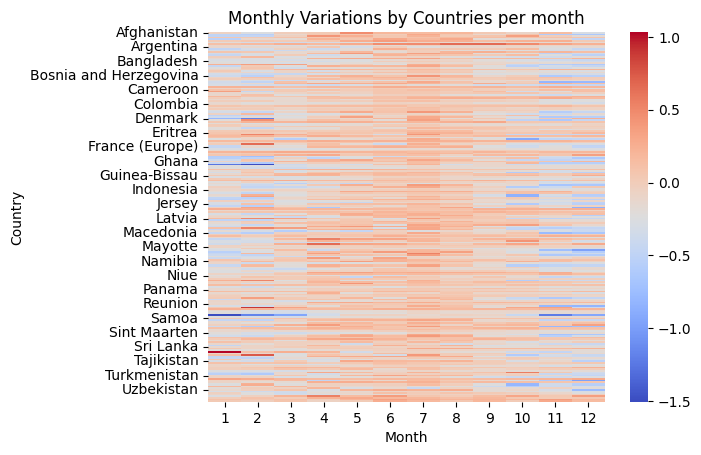

In [208]:
#heatmap_temperature
tempyear_pivottable = df_cleaned.pivot_table(values = 'Monthly_variation', index='Country', columns='Month')
sns.heatmap(tempyear_pivottable, cmap='coolwarm')
plt.title('Monthly Variations by Countries per month')
plt.show()

In [209]:
top_100_max_vr_countries = df_cleaned.nlargest(100, 'Monthly_variation')
count_top_100_max_vr_countries = top_100_max_vr_countries['Country'].value_counts()
print(simple_colors.red('count_top_100_max_vr_countries'))
print(count_top_100_max_vr_countries)

top_100_min_vr_countries = df_cleaned.nsmallest(100, 'Monthly_variation')
count_top_100_min_vr_countries = top_100_min_vr_countries['Country'].value_counts()
print(simple_colors.blue('count_top_100_min_vr_countries'))
print(count_top_100_min_vr_countries)

count_top_100_max_vr_countries
Country
Svalbard and Jan Mayen    24
Finland                   13
Belarus                   11
Estonia                    9
Latvia                     8
Lithuania                  7
Kazakhstan                 7
Sweden                     5
Greenland                  3
Russia                     3
Ukraine                    2
Poland                     2
Mongolia                   1
Denmark                    1
Uzbekistan                 1
Moldova                    1
Turkmenistan               1
Norway                     1
Name: count, dtype: int64
count_top_100_min_vr_countries
Country
Finland                   11
Lithuania                  9
Belarus                    8
Estonia                    8
Poland                     7
Latvia                     6
Kazakhstan                 6
Ukraine                    5
Czech Republic             5
Uzbekistan                 4
Moldova                    4
Slovakia                   3
Germany                   

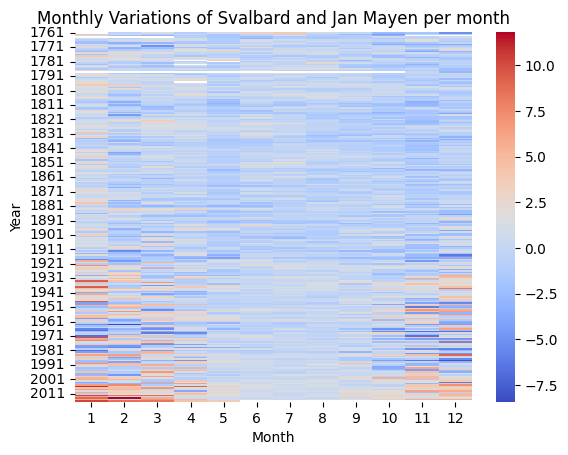

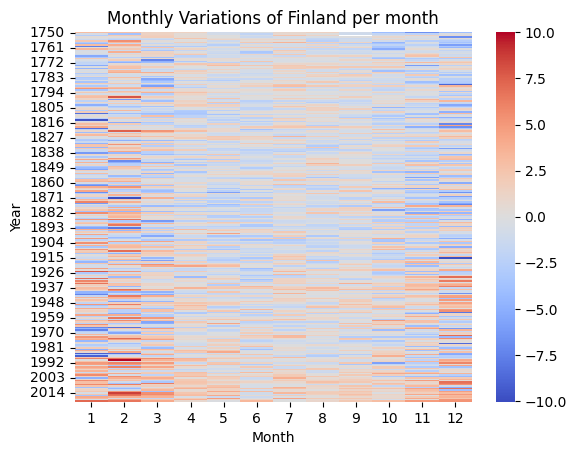

In [210]:
#Since Svalbard and Jan Mayen and Finland had the most variations, we can visualize their data 
df_snjm = df_cleaned[df_cleaned['Country'] == 'Svalbard and Jan Mayen']
df_snjm_pivot = df_snjm.pivot_table(values = 'Monthly_variation', index='Year', columns='Month')
sns.heatmap(df_snjm_pivot, cmap='coolwarm')
plt.title('Monthly Variations of Svalbard and Jan Mayen per month')
plt.show()

df_finland = df_cleaned[df_cleaned['Country'] == 'Finland']
df_finland_pivot = df_finland.pivot_table(values = 'Monthly_variation', index='Year', columns='Month')
sns.heatmap(df_finland_pivot, cmap='coolwarm')
plt.title('Monthly Variations of Finland per month')
plt.show()

In [211]:
monthly_variation_mean = df_cleaned['Monthly_variation'].std()
print('Standard Deviation of monthly variations - Overall:')
print(monthly_variation_mean)
snjm_monthly_variation_mean = df_snjm['Monthly_variation'].std()
print('Standard Deviation of monthly variations - Svalbard and Jan Mayen:')
print(snjm_monthly_variation_mean)
finland_monthly_variation_mean = df_finland['Monthly_variation'].std()
print('Standard Deviation of monthly variations - Finland:')
print(finland_monthly_variation_mean)

Standard Deviation of monthly variations - Overall:
1.2312955350408208
Standard Deviation of monthly variations - Svalbard and Jan Mayen:
1.9845937116646022
Standard Deviation of monthly variations - Finland:
2.297891914778922


### _We can say that Svalbard and Jan Mayen and Finland are two of the most impacted countries from climate change, with a standard deviation of Monthly Variations of 1.98 and 2.29 respectevely. This can be compared to Overall standard deviation of 1.23._

In [213]:
df_cleaned.to_csv('E:/WPI/Fall_2024/CS539_MachineLearning/Assignments/1/datasets/1 climate change/cleaned_data.csv', index=False)